# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

# 读取数据，并将赋值给`original_penguins`

In [2]:
import pandas as pd

In [3]:
original_penguins = pd.read_csv('D:\\练习\项目实战 _ 可视化帕默群岛企鹅数据\\penguins.csv')
original_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# 评估和清理数据

将`original_penguins`复制，将复制的文件命名为`cleaned_penguins`，清理之后的数据都赋值给`cleaned_penguins`。

In [33]:
cleaned_penguins = original_penguins.copy()

#### 数据的整齐度

In [5]:
original_penguins.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
146,Adelie,Dream,39.2,18.6,190.0,4250.0,MALE
179,Chinstrap,Dream,49.5,19.0,200.0,3800.0,MALE
226,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,FEMALE
88,Adelie,Dream,38.3,19.2,189.0,3950.0,MALE
322,Gentoo,Biscoe,47.2,15.5,215.0,4975.0,FEMALE


从随机抽取的5行数据来看，`penguins`的数据满足一行对应一个观察值，一列对应一个变量，一个单元格对应一个值。   
因此该列表数据整齐度较高，无需清理。

#### 数据的干净度

首先使用info对数据进行大致了解

In [22]:
cleaned_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


从输出的结果来看，`penguins`一共344条观察值，而`culmen_length_mm`、`culmen_depth_mm `、`flipper_length_mm  `、`body_mass_g `等变量存在缺失值。   
而这些变量所对应的含义分别为culmen_length_mm：企鹅嘴峰的长度（单位为毫米）、culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）、flipper_length_mm：企鹅鳍的长度（单位为毫米）、body_mass_g：企鹅体重（单位为克），这些含有缺失值的变量将在后续评估和清理。

此外，对于数据类型方面，由于`species`、`island`、`sex `等分类变量可以转换为`category`类型，以节省文件大小。

In [38]:
cleaned_penguins['species'] = original_penguins['species'].astype('category')

In [35]:
cleaned_penguins['island'] = cleaned_penguins['island'].astype('category')

In [36]:
cleaned_penguins['sex'] = cleaned_penguins['sex'].astype('category')

In [39]:
cleaned_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


`species`、`island`、`sex `等变量已经全部修改为`category`类型。

#### 处理缺失数据

culmen_length_mm：企鹅嘴峰的长度（单位为毫米）、culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）、flipper_length_mm：企鹅鳍的长度（单位为毫米）、body_mass_g：企鹅体重（单位为克），这些变量与我们评估数据的目的息息相关。

先提取`culmen_length_mm`空缺的数据进行查看。

In [42]:
cleaned_penguins[cleaned_penguins['culmen_length_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


从分析结果可以看出，`culmen_length_mm`列数据为空值的观察值，`culmen_depth_mm `、`flipper_length_mm  `、`body_mass_g `等列的数据也为空值。

因此可以推测`culmen_depth_mm `、`flipper_length_mm  `、`body_mass_g `等变量的数据缺失结果与`culmen_length_mm`的数据缺失结果相同。

即四者都在同一观察值下缺失，验证猜想。

In [43]:
cleaned_penguins.dropna(subset='culmen_length_mm')['culmen_depth_mm'].isnull().sum()

0

In [44]:
cleaned_penguins.dropna(subset='flipper_length_mm')['culmen_depth_mm'].isnull().sum()

0

In [45]:
cleaned_penguins.dropna(subset='body_mass_g')['culmen_depth_mm'].isnull().sum()

0

根据以上结果，猜想得以验证，清理缺失数据。

In [46]:
cleaned_penguins = cleaned_penguins.dropna(subset='culmen_length_mm')

#### 清理重复数据

由于`culmen_length_mm`、`culmen_depth_mm `、`flipper_length_mm  `、`body_mass_g `等变量是区分不同企鹅的关键信息，因此先对这四个个变量进行重复值筛选。

In [51]:
cleaned_penguins.duplicated(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']).sum()

0

根据分析结果，无重复数据，因此不需要清理重复数据。

#### 处理不一致数据

`species`、`island`、`sex`等类别有可能存在不同值指代同一种类、岛屿、性别等情况。

In [53]:
cleaned_penguins['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [54]:
cleaned_penguins['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [55]:
cleaned_penguins['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

从以上输出结果可以看出，变量`sex`中出现`·`,不能明确是`MALE`还是`FEMALE`，先进行查看。

In [59]:
cleaned_penguins[cleaned_penguins['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


由于不知道性别，因此对后续与性别相关的分析影响很大，因此考虑删除。

In [70]:
cleaned_penguins = cleaned_penguins.drop(336)

#### 处理无效或者错误数据

In [72]:
cleaned_penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,341.000000,341.000000,341.000000,341.000000
mean,43.920235,17.155425,200.868035,4199.780059
std,5.467516,1.976124,14.055255,802.300201
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从上面的结果来看，该表格不存在无效或者错误数据

# 保存数据

In [77]:
cleaned_penguins.to_csv("D:\练习\项目实战 _ 可视化帕默群岛企鹅数据\cleaned_penguins.csv", index=False)

In [78]:
pd.read_csv("D:\练习\项目实战 _ 可视化帕默群岛企鹅数据\cleaned_penguins.csv")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
336,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
337,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
338,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
339,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# 数据的可视化

我们通过数据可视化，进行探索和分析，从图标数据中获得企鹅样本数据的相关洞察。

#### 读取数据，并赋值给original_cleaned_penguins

In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
original_cleaned_penguins = pd.read_csv("D:\练习\项目实战 _ 可视化帕默群岛企鹅数据\cleaned_penguins.csv")

In [6]:
original_cleaned_penguins.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
329,Gentoo,Biscoe,50.5,15.2,216.0,5000.0,FEMALE
286,Gentoo,Biscoe,49.5,16.2,229.0,5800.0,MALE
190,Chinstrap,Dream,53.5,19.9,205.0,4500.0,MALE
336,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
265,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,FEMALE


In [8]:
# 先设置色盘，设置图表的色盘为‘pastel’
sns.set_palette('pastel')

#### 企鹅种类的比例

先获取各个企鹅种类的占比

In [11]:
penguins_species_counts = original_cleaned_penguins['species'].value_counts()

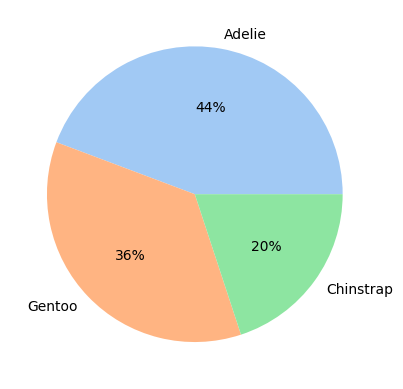

In [24]:
plt.pie(penguins_species_counts, labels=penguins_species_counts.index, autopct='%.0f%%')
plt.show()

样本中`Adelie`这个种类的企鹅占比最大，`Gentoo`这个种类的企鹅占比中等，`Chinstrap`这个种类的企鹅占比最少。

看一下那个岛屿上企鹅最多

In [33]:
island_counts = original_cleaned_penguins['island'].value_counts()

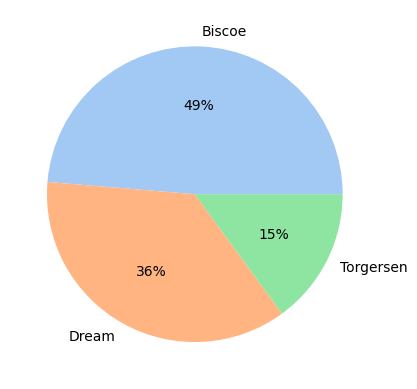

In [35]:
plt.pie(island_counts, labels=island_counts.index, autopct='%.0f%%')
plt.show()

样本中`Biscoe`这个岛屿的企鹅占比最大，`Dream`这个岛屿的企鹅占比中等，`Torgersen`这个岛屿的企鹅占比最少。

看一下企鹅的性别占比

In [37]:
sex_counts = original_cleaned_penguins['sex'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

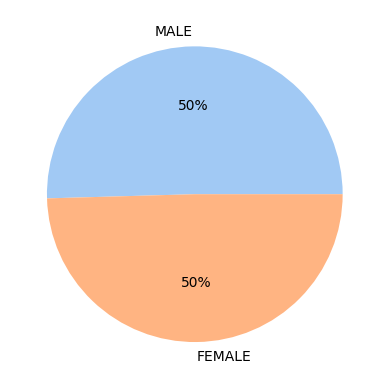

In [38]:
plt.pie(sex_counts, labels=sex_counts.index, autopct='%.0f%%')
plt.show

样本中雌性企鹅和雄性企鹅的比例相同

#### 不同岛上企鹅的种类

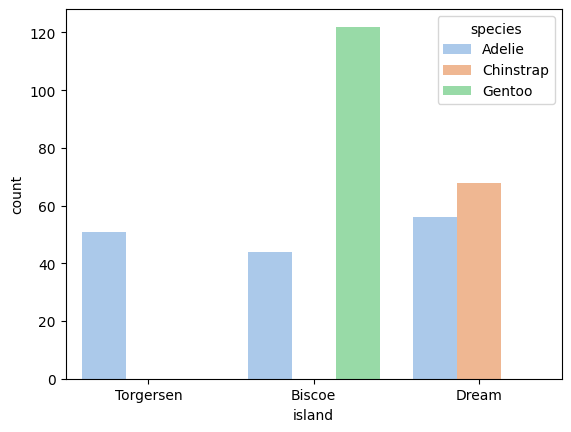

In [40]:
# 使用计数图
sns.countplot(original_cleaned_penguins, x='island', hue='species')
plt.show()

从以上可以看处，`Adelie`这个种类的企鹅在三个岛屿上都有，`Chinstrap`这个种类的企鹅只在`Dream`这个岛屿上有，`Gentoo`这个种类的企鹅只在`Biscoe`这个岛屿上有。

#### 不同岛屿上的企鹅性别

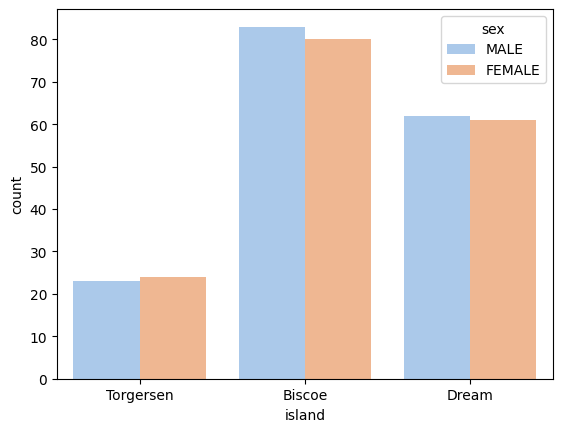

In [41]:
sns.countplot(original_cleaned_penguins, x='island', hue='sex')
plt.show()

#### 查看数值之间的相关关系

直接使用`pairlot`展示变量间的两两关系

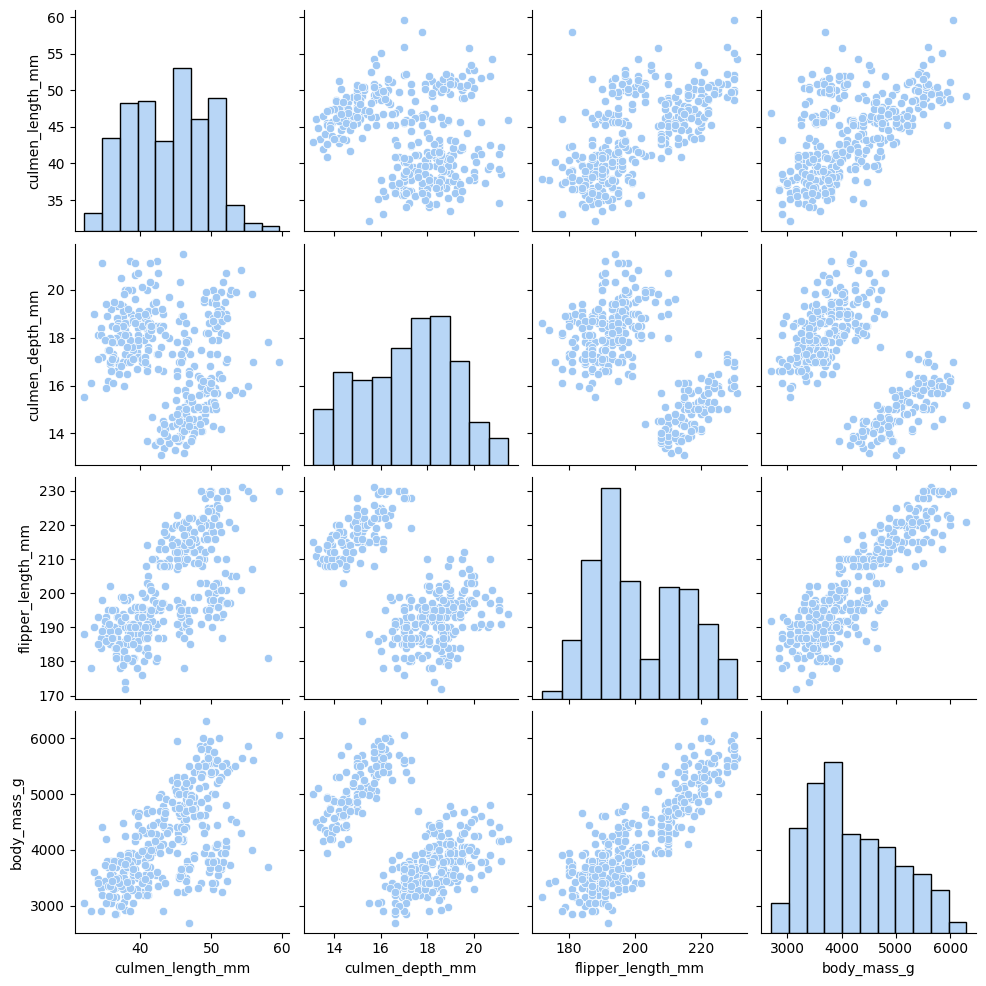

In [42]:
sns.pairplot(original_cleaned_penguins)

从直方图来看，企鹅样本间的嘴峰长度、嘴峰深度、鳍长、体重的分布不是正态分布，一方面说明这里面可能存在多组存在差异的样本数据，另一方面杨嫩数目不够大。      

另外可以从散点图中可以看到多个集群，可能与某些因素有关，比如企鹅种类、性别,可以进一步分类。

#### 根据种类查看数值变量之间的关系

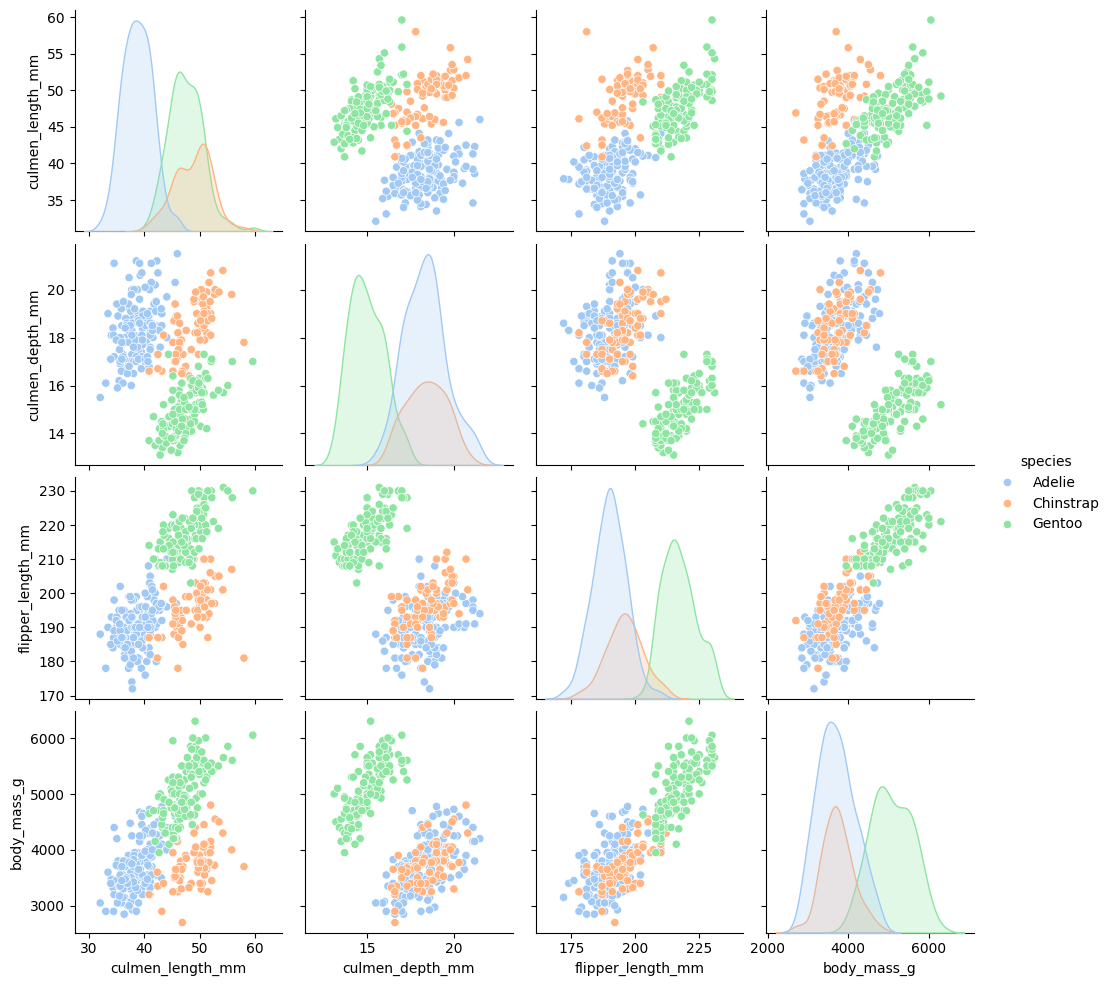

In [43]:
sns.pairplot(original_cleaned_penguins, hue='species')

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明统一种类的企鹅在嘴峰长度、嘴峰深度、鳍长、体重之间的关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数据推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数据。

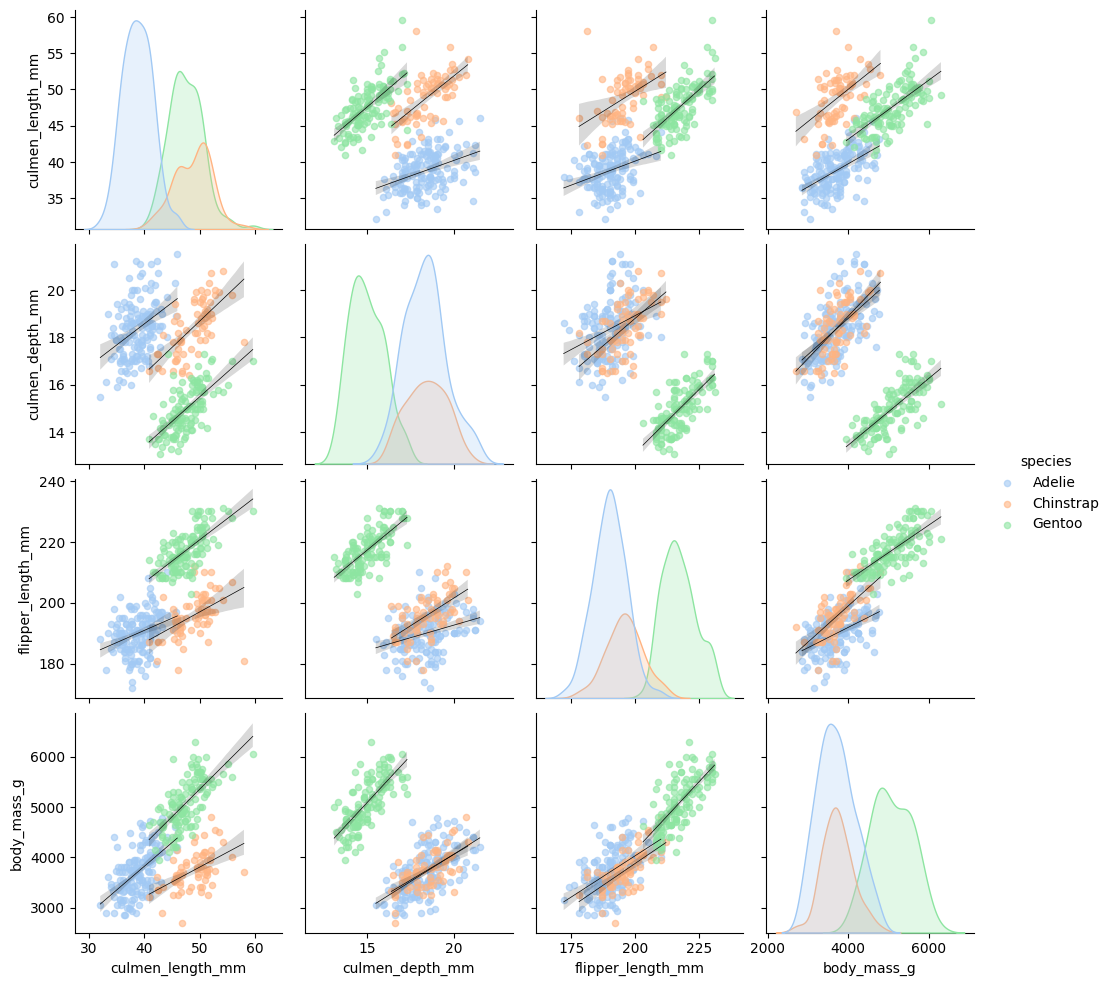

In [68]:
# reg表示regression line回归线
# plot_kws 可以调节图画各种参数，
sns.pairplot(original_cleaned_penguins, hue='species', kind='reg', plot_kws={'scatter_kws':{'s':20, 'alpha':0.6},
                                                                             'line_kws': {'linewidth':0.5, 'color': 'black'}})


散点图结合线性回归线来看，同类企鹅的属性数据之间成线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重。

#### 企鹅性别对数值的影响

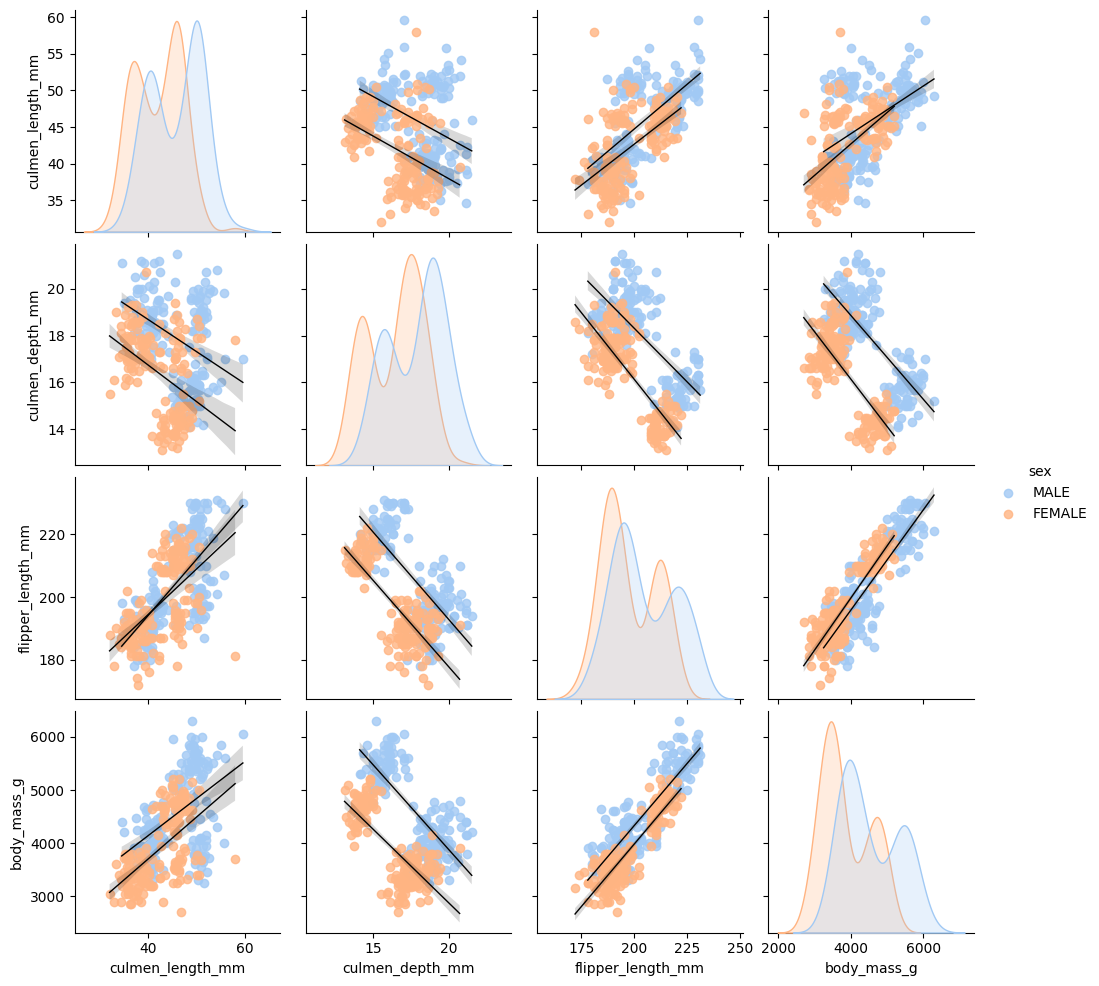

In [72]:
sns.pairplot(original_cleaned_penguins, hue='sex', kind='reg', plot_kws={'line_kws':{'linewidth':1, 'color':'black'}})